In [ ]:
!nvidia-smi

Sat May 28 06:21:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    36W / 250W |   5307MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import cv2

cv2.__version__

'4.1.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip3 install openmim
!mim install mmcv-full

In [ ]:
# !mkdir /content/drive/MyDrive/mmdetection
!cd /content/drive/MyDrive/mmdetection

In [ ]:
cd /content/drive/MyDrive/mmdetection

/content/drive/MyDrive/mmdetection


In [ ]:
# !git clone https://github.com/open-mmlab/mmdetection.git

In [ ]:
!cd /content/drive/MyDrive/mmdetection/mmdetection

In [ ]:
cd /content/drive/MyDrive/mmdetection/mmdetection

/content/drive/MyDrive/mmdetection/mmdetection


In [ ]:
!pip install -r requirements/build.txt
!pip install -v -e .

In [ ]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.11.0+cu113 True
2.24.1
11.3
GCC 7.3


In [ ]:
import mmcv
from mmcv import Config
from mmcv.runner import load_checkpoint
import matplotlib.pyplot as plt

from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
from mmdet.apis import inference_detector, show_result_pyplot
import os.path as osp

In [ ]:

cfg.dataset_type = 'COCODataset'
cfg = Config.fromfile('/content/drive/MyDrive/mmdetection/mmdetection/configs/mask_rcnn/mask_rcnn_x101_64x4d_fpn_1x_coco.py')

# modify num classes of the model in box head and mask head
cfg.model.roi_head.bbox_head.num_classes = 1
cfg.model.roi_head.mask_head.num_classes = 1

cfg.device='cuda'
cfg.data.workers_per_gpu = 0

# We can initialize the logger for training and have a look
# at the final config used for training
# print(f'Config:\n{cfg.pretty_text}')



In [ ]:
model = build_detector(cfg.model)

# Add an attribute for visualization convenience
model.CLASSES = ('walrus',)

checkpoint = '/content/drive/MyDrive/mmdetection/mmdetection/exps/mask_rcnn_x101_64x4d_fpn_1x/epoch_12.pth'

# Set the device to be used for evaluation
device='cuda:0'

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = cfg

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

load checkpoint from local path: /content/drive/MyDrive/mmdetection/mmdetection/exps/mask_rcnn_x101_64x4d_fpn_1x/epoch_12.pth


MaskRCNN(
  (backbone): ResNeXt(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequ

/content/drive/MyDrive/mmdetection/mmdetection/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


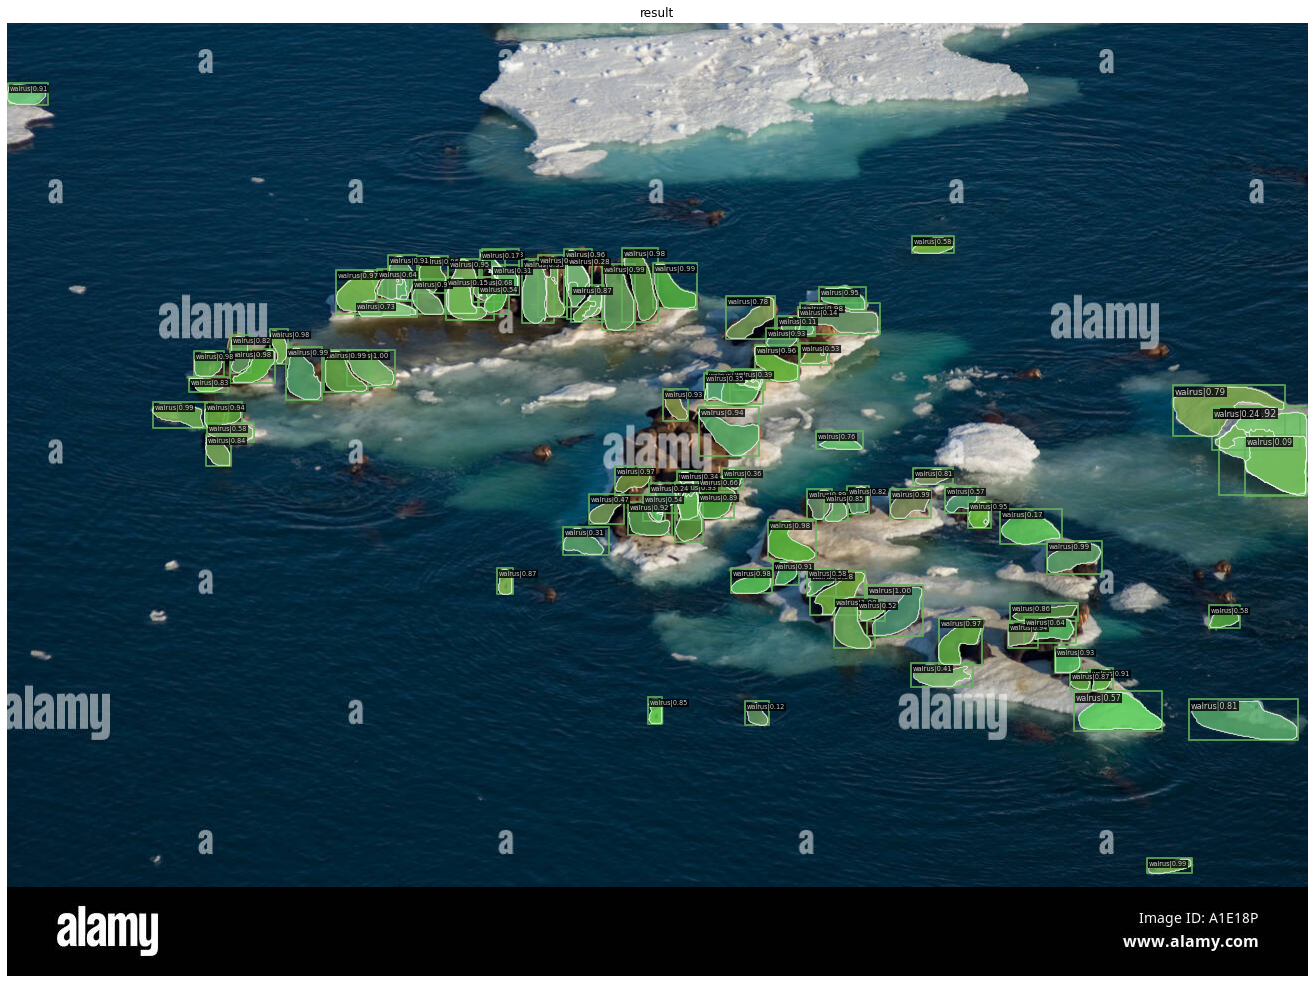

In [ ]:
img = mmcv.imread('/content/drive/MyDrive/mmdetection/mmdetection/demo/image161.jpg')

result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.01)

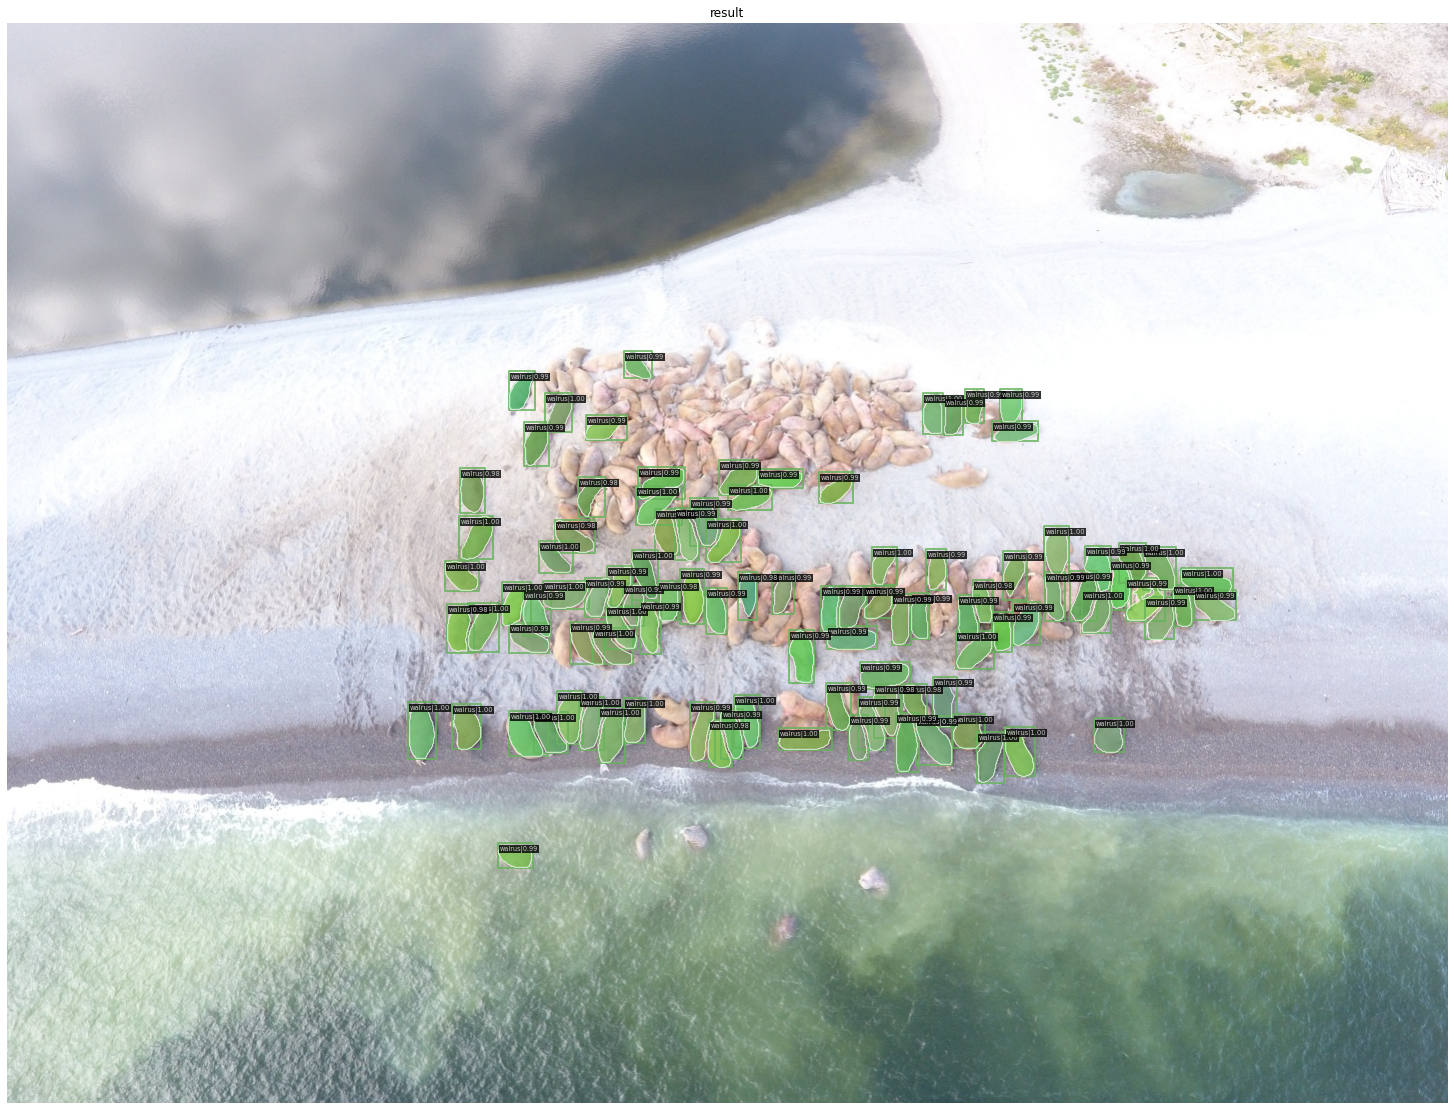

In [ ]:
img = mmcv.imread('/content/drive/MyDrive/mmdetection/mmdetection/demo/DJI_0034.jpg')

result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.01)